In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('poster')
sns.set_color_codes()
sns.set_style('white')

In [3]:
from clumpy.datasets import fetch_cars
data = fetch_cars()
data.drop(['name'], axis=1, inplace=True)
data.head(10)

/home/joshua/workspace/scikit-learn/sklearn/cross_validation.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/joshua/workspace/scikit-learn/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


,economy (mpg),cylinders,displacement (cc),power (hp),weight (lb),0-60 mph (s),year
0,13.0,8,360.0,175.0,3821,11.0,73
1,15.0,8,390.0,190.0,3850,8.5,70
2,17.0,8,304.0,150.0,3672,11.5,72
3,20.2,6,232.0,90.0,3265,18.2,79
4,18.1,6,258.0,120.0,3410,15.1,78
5,23.0,4,151.0,NaN,3035,20.5,82
6,19.4,6,232.0,90.0,3210,17.2,78
7,24.3,4,151.0,90.0,3003,20.1,80
8,18.0,6,232.0,100.0,2789,15.0,73
9,19.0,6,232.0,100.0,2634,13.0,71


In [4]:
from clumpy.preprocessing import process_data

numeric_cols = ['economy (mpg)', 'displacement (cc)', 'power (hp)', 'weight (lb)', '0-60 mph (s)']
ordinal_cols = ['cylinders', 'year']
columns = numeric_cols + ordinal_cols

X = process_data(data[columns], impute='mean', num_preprocessing='minmax')

In [5]:
from clumpy import auto_kmeans
kmeans = auto_kmeans(X, n_clusters=[3, 4, 5])

In [6]:
kmeans.n_clusters

4

In [61]:
from clumpy.rules import tree_descriptions

rules = tree_descriptions(data[columns], 
                  kmeans.labels_, 
                  feature_names=columns,
                  max_depth=20,
                  n_features=5)

In [60]:
for rule in rules:
    print(rule)
    print

displacement (cc) <= 140.5 AND
year <= 76.5 

displacement (cc) > 284.5 AND
economy (mpg) <= 21.6 

cylinders > 4.5 AND
displacement (cc) <= 284.5 AND
economy (mpg) <= 29.75 

displacement (cc) <= 162.0 AND
economy (mpg) > 26.9 AND
year > 76.5 



   displacement (cc)  power (hp)  0-60 mph (s)  cylinders       year        id
0         193.425879  104.469388     15.568090   5.454774  76.010050  marginal
0         106.405263   81.563830     16.524211   3.968421  73.484211   cluster


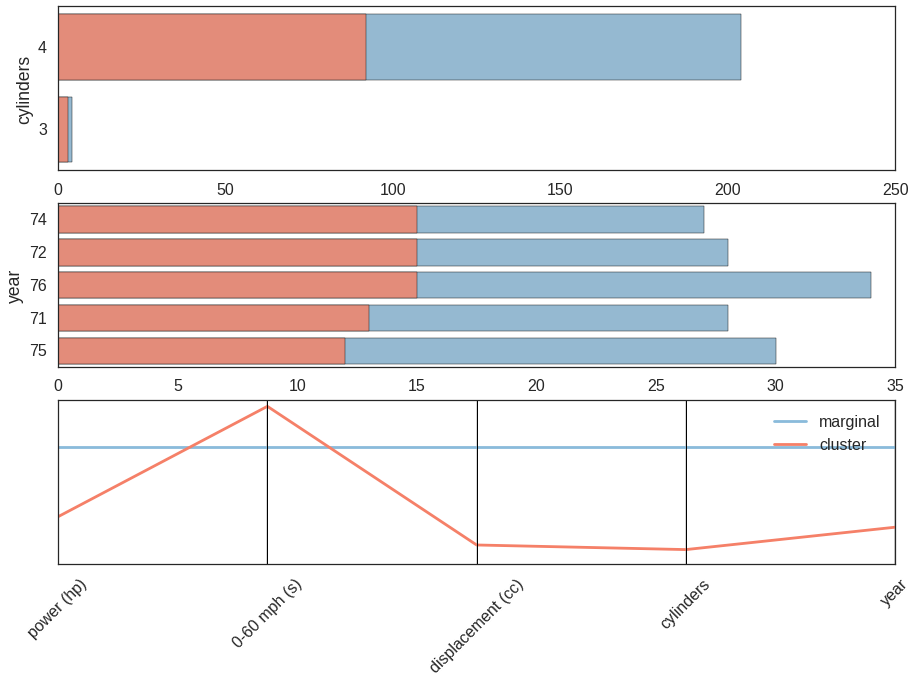

In [58]:
from clumpy import importance
from clumpy.plots import plot_cluster_statistics

X = process_data(data)
importances = importance.anova_importance(X, kmeans.labels_, feature_names=columns, n_features=5)

cluster_id = 0
cluster_importances = importances[cluster_id]
cat_vars = [var for var in cluster_importances if var in ordinal_cols]
num_vars = [var for var in cluster_importances if var in columns]

plot_cluster_statistics(
    cluster_labels=kmeans.labels_, 
    cluster_id=cluster_id, 
    data=data, 
    scale=True,
    quant_var=num_vars,
    qual_var=cat_vars,
    figsize=(15,10))